# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing data

In [2]:
#1st dataset
claims = pd.read_csv(r"C:\Users\prana\Desktop\Quarntine\AnalatyicsLab\Python\3._Case_Studies_Final_Projects_-_Python\5. Pandas Case Study 3 - Insurance Claims Case Study\claims.csv")
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [3]:
#2nd dataset
cust = pd.read_csv(r"C:\Users\prana\Desktop\Quarntine\AnalatyicsLab\Python\3._Case_Studies_Final_Projects_-_Python\5. Pandas Case Study 3 - Insurance Claims Case Study\cust_demographics.csv")
cust.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [4]:
cust.rename(columns={"CUST_ID":"customer_id"},inplace=True)
cust.head()

,customer_id,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [5]:
# 1. Import claims_data.csv and cust_data.csv which is provided to you and
# combine the two datasets appropriately to create a 360-degree view of
# the data. Use the same for the subsequent questions.
claim_cust = pd.merge(left=claims,right=cust,on='customer_id')
claim_cust.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,Female,01-May-86,MA,413-187-7945,Silver


In [6]:
cust

,customer_id,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [7]:
# Perform a data audit for the datatypes and find out if there are any
# mismatch within the current datatypes of the columns and their
# business significance.

claim_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
claim_id               1085 non-null int64
customer_id            1085 non-null int64
incident_cause         1085 non-null object
claim_date             1085 non-null object
claim_area             1085 non-null object
police_report          1085 non-null object
claim_type             1085 non-null object
claim_amount           1020 non-null object
total_policy_claims    1075 non-null float64
fraudulent             1085 non-null object
gender                 1085 non-null object
DateOfBirth            1085 non-null object
State                  1085 non-null object
Contact                1085 non-null object
Segment                1085 non-null object
dtypes: float64(1), int64(2), object(12)
memory usage: 135.6+ KB


In [8]:
claim_cust.isnull().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
dtype: int64

In [9]:
#3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.
claim_cust['claim_amount'] = claim_cust["claim_amount"].str.replace("$"," ")
claim_cust['claim_amount'] = claim_cust['claim_amount'].astype(float)

In [10]:
#4.Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.
claim_cust['Flag'] = np.where(claim_cust.police_report == 'Unknown',0,1)
claim_cust

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Flag
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum,1
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver,0
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver,1
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,Female,11-Mar-84,TN,798-631-4758,Silver,1
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,Female,01-May-86,MA,413-187-7945,Silver,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No,Female,15-Mar-81,ND,459-425-4319,Platinum,1
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No,Female,07-Jul-96,ID,529-462-1635,Silver,1
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No,Male,11-Apr-90,WI,712-651-9613,Gold,1
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No,Female,22-Oct-64,LA,469-345-5617,Silver,1


In [11]:
#5.One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved.
#However, customer ID should remain unique.
claim_cust.drop_duplicates(subset = 'customer_id',keep = 'last')

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Flag
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum,1
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver,0
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,Female,11-Mar-84,TN,798-631-4758,Silver,1
5,91609100,47830476,Natural causes,04/12/2017,Auto,Unknown,Material only,1440.0,1.0,No,Female,01-May-86,MA,413-187-7945,Silver,0
7,39219616,19269962,Other causes,09/26/2018,Auto,No,Material only,2240.0,2.0,No,Male,13-May-77,NV,956-871-8691,Gold,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No,Female,15-Mar-81,ND,459-425-4319,Platinum,1
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No,Female,07-Jul-96,ID,529-462-1635,Silver,1
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No,Male,11-Apr-90,WI,712-651-9613,Gold,1
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No,Female,22-Oct-64,LA,469-345-5617,Silver,1


In [12]:
claim_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
claim_id               1085 non-null int64
customer_id            1085 non-null int64
incident_cause         1085 non-null object
claim_date             1085 non-null object
claim_area             1085 non-null object
police_report          1085 non-null object
claim_type             1085 non-null object
claim_amount           1020 non-null float64
total_policy_claims    1075 non-null float64
fraudulent             1085 non-null object
gender                 1085 non-null object
DateOfBirth            1085 non-null object
State                  1085 non-null object
Contact                1085 non-null object
Segment                1085 non-null object
Flag                   1085 non-null int32
dtypes: float64(2), int32(1), int64(2), object(11)
memory usage: 139.9+ KB


In [13]:
#6.Check for missing values and impute the missing values with an appropriate value.
#(mean for continuous and mode for categorical)

#categorical 
claim_cust['total_policy_claims'].replace(np.NaN,claim_cust['total_policy_claims'].mode())

#continous
claim_cust['claim_amount'].replace(np.NaN,claim_cust['claim_amount'].mean())

claim_cust


,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Flag
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum,1
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver,0
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver,1
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,Female,11-Mar-84,TN,798-631-4758,Silver,1
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,Female,01-May-86,MA,413-187-7945,Silver,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No,Female,15-Mar-81,ND,459-425-4319,Platinum,1
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No,Female,07-Jul-96,ID,529-462-1635,Silver,1
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No,Male,11-Apr-90,WI,712-651-9613,Gold,1
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No,Female,22-Oct-64,LA,469-345-5617,Silver,1


In [14]:
#7.Calculate the age of customers in years. Based on the age, categorize the
# customers according to the below criteria
# Children < 18
# Youth 18-30
# Adult 30-60
# Senior > 60

cury = pd.to_datetime('today').year
claim_cust['DateOfBirth'] = pd.to_datetime(claim_cust['DateOfBirth'])
dob = claim_cust.DateOfBirth.dt.year
x = dob - 100
y = cury - x
z =  cury - dob
claim_cust['Age'] = np.where(dob > cury,y,z)
claim_cust['Age']
## customers according to criteria
claim_cust.loc[(claim_cust.Age <= 18),'AgeGroup'] = 'Children'
claim_cust.loc[(claim_cust.Age > 18)  &  (claim_cust.Age <=30),'AgeGroup'] = 'Youth'
claim_cust.loc[(claim_cust.Age > 30)  &  (claim_cust.Age <= 60),'AgeGroup'] = 'Adult'
claim_cust.loc[(claim_cust.Age > 60),'AgeGroup'] = 'Senior'
claim_cust

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Flag,Age,AgeGroup
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,1,41,Adult
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,0,50,Adult
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,1,36,Adult
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,1,36,Adult
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,1,34,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No,Female,1981-03-15,ND,459-425-4319,Platinum,1,39,Adult
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No,Female,1996-07-07,ID,529-462-1635,Silver,1,24,Youth
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No,Male,1990-04-11,WI,712-651-9613,Gold,1,30,Youth
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No,Female,2064-10-22,LA,469-345-5617,Silver,1,56,Adult


In [15]:
#8. What is the average amount claimed by the customers from various segments?
claim_cust.groupby(by='Segment')[['claim_amount']].mean()


,claim_amount
Segment,
Gold,12852.189802
Platinum,12336.517291
Silver,12185.751562


In [16]:
#9.What is the total claim amount based on incident cause for all the claims that have been done at least 
#20 days prior to 1st of October, 2018.

# claim_cust.sort_values('claim_date')
# td = pd.Timedelta("20 days")
# limit_date = 

claim_cust.loc[claim_cust.claim_date < "2018-09-10",:].groupby("incident_cause")["claim_amount"].sum().add_prefix('total_')

incident_cause
total_Crime                  696900.0
total_Driver error          3398420.0
total_Natural causes        1261496.0
total_Other causes          3975375.0
total_Other driver error    3384844.0
Name: claim_amount, dtype: float64

In [17]:
#10.How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

Hwa = claim_cust.loc[(claim_cust.State == 'TX') | (claim_cust.State == 'DE') | (claim_cust.State == 'AK') 
        & (claim_cust.incident_cause == 'Driver error') & (claim_cust.AgeGroup == 'Adult'),
                                                               ['AgeGroup']].count()
Hwa

AgeGroup    57
dtype: int64

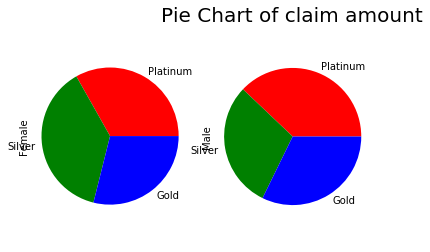

In [35]:
#11.Draw a pie chart between the aggregated value of claim amount based on gender and segment.
ca = pd.pivot_table(claim_cust, index=['Segment'],columns='gender',values='claim_amount',aggfunc='sum')
ca.plot(kind='pie',
        labels = ['Platinum','Silver','Gold'],
        colors = ['r','g','b'],
        subplots = True,
        legend =False)
plt.title('Pie Chart of claim amount',fontsize=20)
plt.axis('equal')
plt.show()

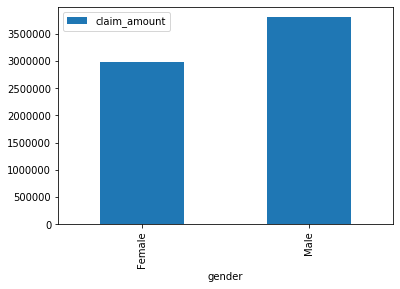

In [19]:
#12.Among males and females, which gender had claimed the most for any type of driver related issues? 
#E.g. This metric can be compared using a bar chart

issue = claim_cust.loc[claim_cust['incident_cause'].isin(['Driver error','Other driver error'])]
group_gender = issue.groupby(['gender'])[['claim_amount']].sum()
group_gender.plot(kind='bar')

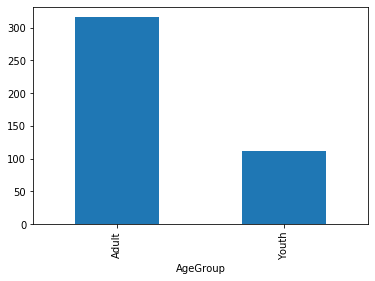

In [38]:
#13.Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.
fraud = claim_cust.loc[claim_cust['fraudulent'] == 'Yes']
group_age = fraud.groupby(['AgeGroup'])['total_policy_claims'].sum()
group_age.plot(kind='bar')

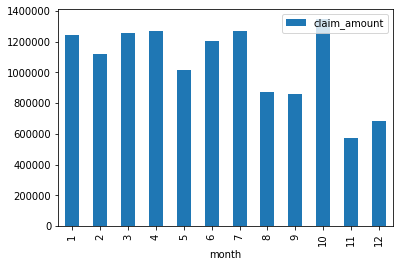

In [44]:
#14.Visualize the monthly trend of the total amount that has been claimed by the customers. 
#Ensure that on the “month” axis, 
#the month is in a chronological order not alphabetical order.
claim_cust.claim_date = pd.to_datetime(claim_cust.claim_date)
claim_cust['month'] = claim_cust.claim_date.dt.month
claim_cust.groupby(['month'])[['claim_amount']].sum().plot(kind='bar')

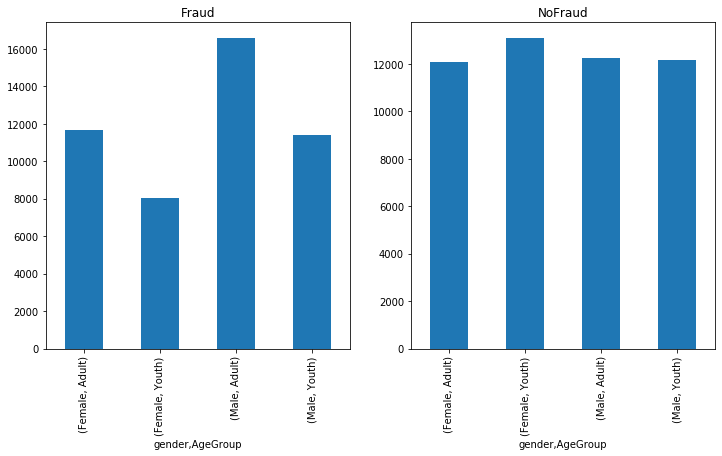

In [59]:
# 15. What is the average claim amount for gender and age categories and
# suitably represent the above using a facetted bar chart, one facet that
# represents fraudulent claims and the other for non-fraudulent claims

fraud = claim_cust.loc[claim_cust['fraudulent'] == 'Yes']
nofraud = claim_cust.loc[claim_cust['fraudulent'] == 'No']

f, axes =plt.subplots(1,2, figsize=(12,6), sharex=True,sharey=False)
fraud.groupby(['gender','AgeGroup'])['claim_amount'].mean().plot(kind='bar',ax = axes[0],title = 'Fraud')
nofraud.groupby(['gender','AgeGroup'])['claim_amount'].mean().plot(kind='bar',ax = axes[1],title = 'NoFraud')


## Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.